In [15]:
import json

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
data_path = "../data.json"
classes = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
with open(data_path, "r") as fp:
        data = json.load(fp)

 # convert lists to numpy arrays
X = np.array(data["mfcc"])
y = np.array(data["labels"])
# X = np.array([x.T for x in X])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                    random_state = 42)

print(X_train.shape)
print(y_train.shape)
input_shape = (X_train.shape[1], X_train.shape[2])

(7988, 130, 13)
(7988,)


In [18]:
from keras.src.callbacks import ModelCheckpoint
from models.genre_first_models import RNNG1

model_wrapper = RNNG1(input_shape=input_shape, output_shape=len(classes))
model_wrapper.create_model()

checkpoint = ModelCheckpoint(filepath="../genre_models/gtzan_models/gtzan_rnng1.keras", monitor='val_accuracy', verbose=1, mode="max", save_best_only=True,
                             save_weights_only=False)

history = model_wrapper.model.fit(X_train, y_train, epochs=30, batch_size=32, shuffle=True, validation_data=(X_test, y_test),
                        callbacks=[checkpoint])

model_wrapper.model.save("../genre_models/gtzan_models/gtzan_rnng1.keras")

C:\Proiecte SSD\Licenta\Basic-Fourier-Usage\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 130, 64)        │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,802 (225.79 KB)

 Trainable params: 57,802 (225.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2035 - loss: 2.2286
Epoch 1: val_accuracy improved from -inf to 0.32683, saving model to ../genre_models/gtzan_models/gtzan_rnng1.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.2037 - loss: 2.2283 - val_accuracy: 0.3268 - val_loss: 1.9607
Epoch 2/30
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3447 - loss: 1.8909
Epoch 2: val_accuracy improved from 0.32683 to 0.41391, saving model to ../genre_models/gtzan_models/gtzan_rnng1.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3450 - loss: 1.8903 - val_accuracy: 0.4139 - val_loss: 1.6643
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4036 - loss: 1.6790
Epoch 3: val_accuracy improved from 0.41391 to 0.46496, saving model to ../genre_models/gtzan_models/gtzan_rnng1.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.4037 - loss: 1.6788 - val_accuracy: 0.4650 - val_loss: 1.5036
Epoch 4/30
249/250 ━━━━━━━━━

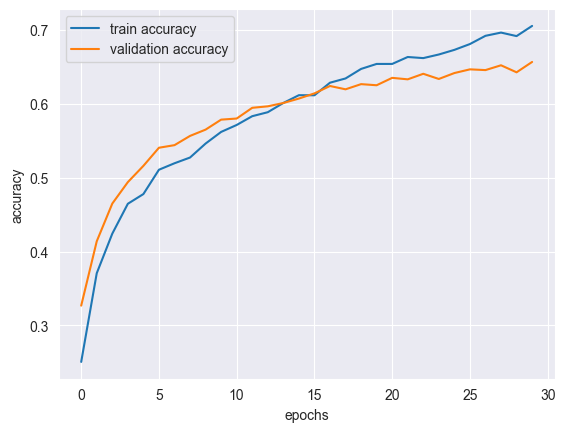

In [19]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

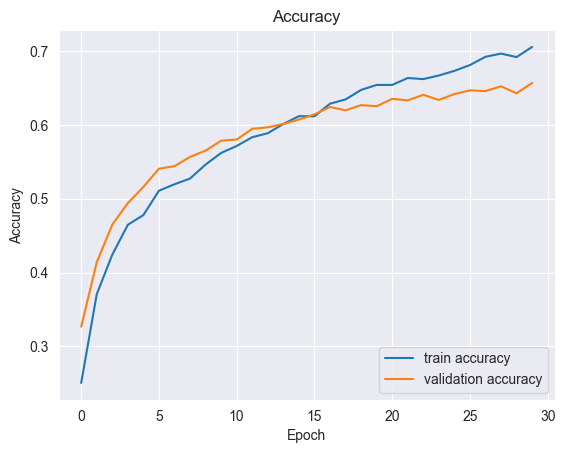

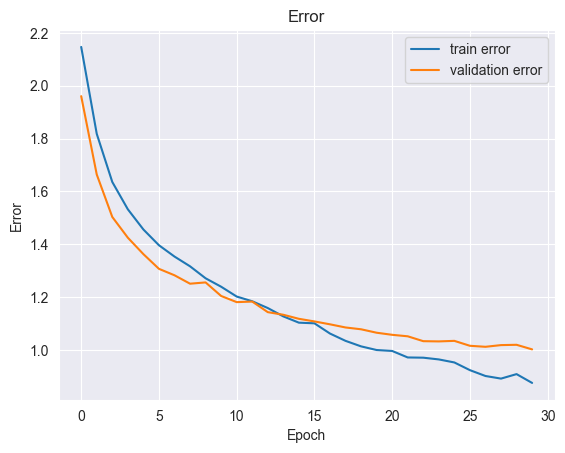

In [20]:
model_wrapper.plot_history(history)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Accuracy :  0.6566566566566566
[1 3 8 ... 0 2 6]
[1 3 2 ... 0 0 6]


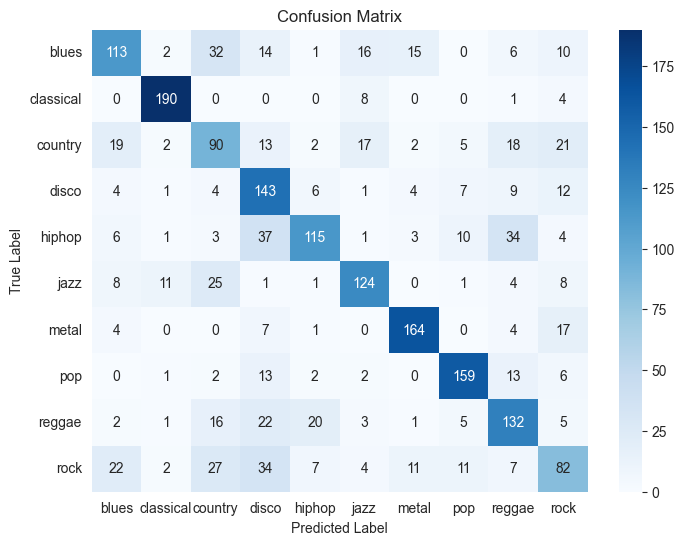

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [21]:
from keras.src.utils import to_categorical
from sklearn.metrics import recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
import seaborn as sns
y_pred = model_wrapper.model.predict(X_test)

y_pred_f = []
for y_val in y_pred:
    l = np.argmax(y_val)
    y_pred_f.append(l)
y_pred_f = np.array(y_pred_f)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_f)
print("Accuracy : ", accuracy)
print(y_test)
print(y_pred_f)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_f)



# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Recall: ", recall_score(y_test, y_pred,average=None))
print("Precision: ", precision_score(y_test, y_pred,average=None))
print("F1-Score: ", f1_score(y_test, y_pred, average=None))